Search Trends
-------------

In [5]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

The 3 peaks show some seasonality.


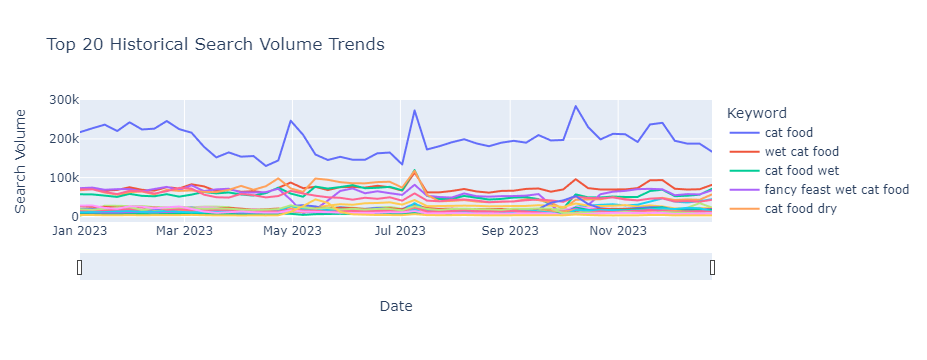

In [6]:
# Load your data
historical_search_volume_data = pd.read_excel('../Customer_Success_Engineer_-_Project_Data.xlsx', sheet_name='Historical Search Volume', header=1)

# Summarize to find the maximum search volume for each keyword/category
summary = historical_search_volume_data.groupby('keyword')['Search Volume'].max().reset_index()

# Sort by 'Search Volume' to get the top 20
top_20_keywords = summary.sort_values(by='Search Volume', ascending=False).head(20)

# Filter the original dataset to include only the top 20 keywords/categories
filtered_data = historical_search_volume_data[historical_search_volume_data['keyword'].isin(top_20_keywords['keyword'])]

# Creating the line chart for the top 20 searches, each in different colors
fig = px.line(filtered_data, x='Start Date', y='Search Volume', color='keyword', title='Top 20 Historical Search Volume Trends')

# Enhancing the plot with labels
fig.update_layout(xaxis_title='Date', yaxis_title='Search Volume', legend_title='Keyword', xaxis=dict(rangeslider=dict(visible=True)))

# Display the plot
fig.show()

Overlay historical search volume overlay on revenue

Search volume doesn't seem to affect revenue much, and revenue seems somewhat cyclical. More research should be conducted to see if certain brands take advantage of search more, and how.

It would be interesting to see how many advertising dollars are spent by each company during these search searches. I'd also like to get more granular with products, and their subcategories vs specific keywords over time. 

In [7]:
# Define the company name here for easy switching
company_name = 'Blue Buffalo'

# Load 'Historical Search Volume' data from the spreadsheet
search_volume_data = pd.read_excel('../Customer_Success_Engineer_-_Project_Data.xlsx', 
                                   sheet_name='Historical Search Volume', 
                                   header=1)

# Load 'Weekly' sales data from the spreadsheet
weekly_data = pd.read_excel('../Customer_Success_Engineer_-_Project_Data.xlsx', 
                            sheet_name='Weekly', 
                            header=1)

# Filter the weekly data for the specified company
weekly_data = weekly_data[weekly_data['Brand'] == company_name]

# Process the 'Week' column in the 'Weekly' data to extract the start and end dates.
weekly_data['StartOfWeek'] = pd.to_datetime(weekly_data['Week'].str.split(' - ').str[0])
weekly_data['EndOfWeek'] = pd.to_datetime(weekly_data['Week'].str.split(' - ').str[1])

# Ensure the 'Start Date' and 'End Date' in the 'Historical Search Volume' are in datetime format.
search_volume_data['Start Date'] = pd.to_datetime(search_volume_data['Start Date'])
search_volume_data['End Date'] = pd.to_datetime(search_volume_data['End Date'])

# Function to check if a date from the weekly data falls within the search volume data range
def is_within_date_range(row, search_volume_df):
    condition = (search_volume_df['Start Date'] <= row['StartOfWeek']) & \
                (search_volume_df['End Date'] >= row['StartOfWeek'])
    matched_row = search_volume_df[condition]
    if not matched_row.empty:
        return matched_row.iloc[0]['Search Volume'], matched_row.iloc[0]['keyword']
    else:
        return np.nan, np.nan

# Apply the function across the weekly data to create new columns for Search Volume and keyword.
weekly_data['Search Volume'], weekly_data['Keyword'] = zip(*weekly_data.apply(lambda row: is_within_date_range(row, search_volume_data), axis=1))

# Create a figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add revenue trace
fig.add_trace(
    go.Bar(
        x=weekly_data['StartOfWeek'],
        y=weekly_data['Revenue'],
        name='Revenue',
        marker_color='blue'
    ),
    secondary_y=False,
)

# Add search volume trace
fig.add_trace(
    go.Scatter(
        x=weekly_data['StartOfWeek'],
        y=weekly_data['Search Volume'],
        name='Search Volume',
        marker_color='red'
    ),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text=f"Revenue and Search Volume Over Time for {company_name}"
)

# Set x-axis title
fig.update_xaxes(title_text="Week Start Date")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Revenue</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>Search Volume</b>", secondary_y=True)

# Show figure
fig.show()